In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from joblib import parallel_backend
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv(r"D:\NATPAC\Datasets\combined.csv")
df.drop(df.columns[0], axis=1, inplace=True)

X = df.drop(columns=['2022'])
y = df['2022']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],
    'epsilon': [0.1, 0.2, 0.5]
}

svr = SVR()

grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_absolute_error')

with parallel_backend('threading', n_jobs=-1):
    grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

In [3]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import numpy as np

df = pd.read_csv(r"D:\NATPAC\Datasets\combined.csv")
df.drop(df.columns[0], axis=1, inplace=True)

X = df.drop(columns=['2022'])
y = df['2022']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_svr = SVR()
model_svr.fit(X_train, y_train)

predictions_svr = model_svr.predict(X_test)

mae_svr = mean_absolute_error(y_test, predictions_svr)
print("Mean Absolute Error for SVR model:", mae_svr)

model_svr.fit(X, y)

features_2022 = df[df.columns.difference(['2022'])].tail(366)
forecast_2022_svr = model_svr.predict(features_2022)
print(forecast_2022_svr)

Mean Absolute Error for SVR model: 662543.4024114455
[1198180.04281599 1198179.65812869 1198179.75288492 1198180.3785505
 1198179.90344084 1198179.42970182 1198179.85684955 1198180.03908253
 1198179.83177462 1198180.10571457 1198179.93562762 1198180.04017772
 1198180.08029759 1198180.09988388 1198178.89778241 1198180.0248911
 1198179.79088571 1198180.0478137  1198179.69413456 1198179.82529458
 1198180.28092825 1198178.80182969 1198179.98258985 1198179.96509885
 1198179.48394341 1198179.77640228 1198179.72782506 1198179.91165999
 1198179.41541117 1198179.94954649 1198179.90014614 1198179.88100876
 1198179.75402432 1198179.68098667 1198179.72826614 1198179.50094959
 1198180.08305921 1198179.77764757 1198179.90952136 1198180.09709309
 1198179.97493146 1198179.68144472 1198180.00331549 1198179.51197906
 1198180.0937725  1198179.61799443 1198180.48903958 1198179.86947549
 1198179.96105538 1198180.30243827 1198179.46113963 1198179.76758403
 1198180.16118435 1198179.92325592 1198179.65964938 

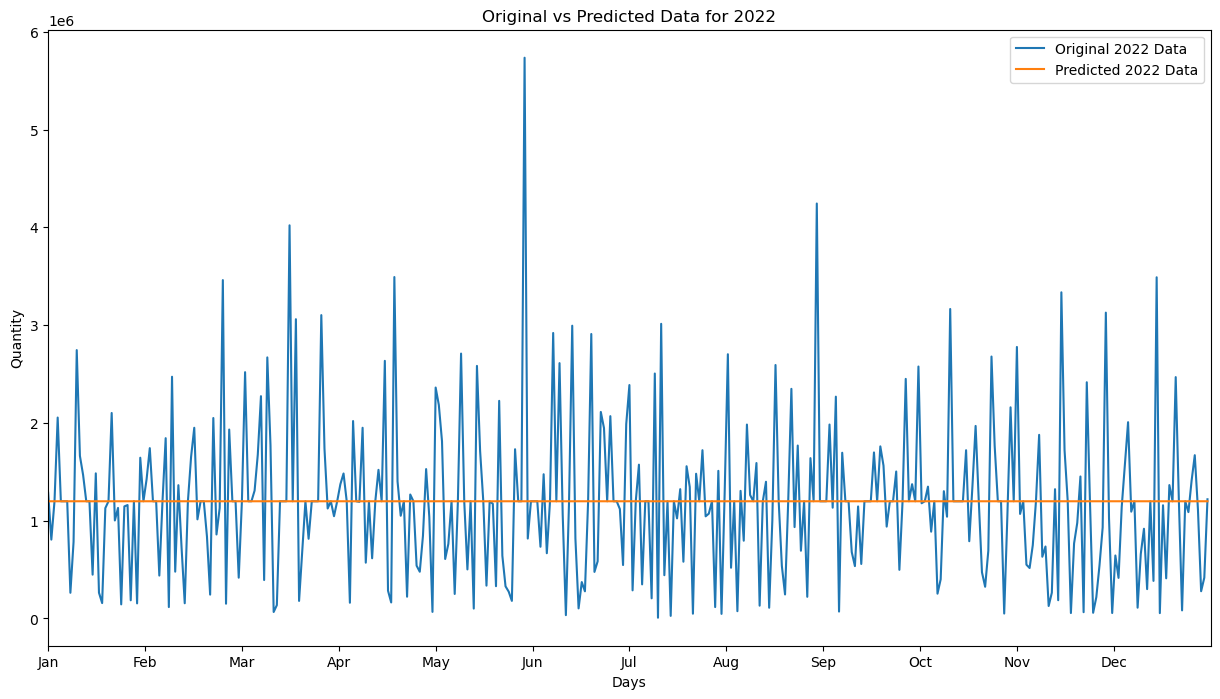

In [4]:
import matplotlib.pyplot as plt
original_data_2022 = df['2022'].tail(366).values
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_ticks = np.arange(0, 366, 30.5)
days = range(366)
plt.figure(figsize=(15, 8))
plt.plot(original_data_2022, label='Original 2022 Data')
plt.plot(forecast_2022_svr, label='Predicted 2022 Data')
plt.xlabel('Days')
plt.ylabel('Quantity')
plt.title('Original vs Predicted Data for 2022')
plt.xticks(month_ticks, months)
plt.xlim(0, 366)
plt.legend()
plt.show()